# H2O


H2O is an open source, in-memory, distributed, fast, and scalable machine learning and predictive analytics platform that allows you to build machine learning models on big data and provides easy productionalization of those models in an enterprise environment.

**Add useful links**

## Install and Import

In [11]:

import h2o
from h2o.automl import H2OAutoML
import pandas as pd


In [12]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 hours 14 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_ubuntu_5iun96
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,905 Mb
H2O_cluster_total_cores:,1
H2O_cluster_allowed_cores:,1
H2O_cluster_status:,"locked, healthy"


#### Load the heart disease dataset

We are keeping the data as-is with the exception of handling the Nan values  

H2OAutoML accepts a list of categorical features and has several methods for treating categorical data. 

In [13]:
'''
/mnt/data/raw/heart.csv

attribute documentation:
      age: age in years
      sex: sex (1 = male; 0 = female)
      cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
     chol: serum cholestoral in mg/dl
     fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
     thalach: maximum heart rate achieved
     exang: exercise induced angina (1 = yes; 0 = no)
     oldpeak = ST depression induced by exercise relative to rest
     slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     ca: number of major vessels (0-3) colored by flourosopy
     thal: 
         3 = normal; 
         6 = fixed defect; 
         7 = reversable defect
     target: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
 '''

#load and clean the data----------------------

#column names
names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang', \
         'oldpeak','slope','ca','thal','target']

#load data from Domino project directory
hd_data = pd.read_csv("./data/raw/heart.csv", header=None, names=names)

#in case some data comes in as string
#convert to numeric and coerce errors to NaN
for col in hd_data.columns:  # Iterate over chosen columns
    hd_data[col] = pd.to_numeric(hd_data[col], errors='coerce')
    
#drop nulls
hd_data.dropna(inplace=True)


We first need to load the data into a H2O specific data object

In [14]:
hf = h2o.H2OFrame(hd_data)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Then, we identify the column names for both the x and y values within the H2O data

In [15]:
x = hf.columns
y = "target"
x.remove(y)

Then, we change the labels into a categorical variable for prediction purposes

In [16]:
hf[y] = hf[y].asfactor()

And, we are ready to get training after just a few simple steps. There are many variables that can be configured, https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html. For this demo, we will set the max models to test and the seed. 

In [ ]:
%%time

aml = h2o.automl.H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=hf)

AutoML progress: |███████████████████████████████████████████████

Now, we can take a look at how the different models performed 

In [23]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid_1_AutoML_3_20220921_195243_model_1,0.907378,0.378851,0.9057,0.183663,0.346195,0.119851
GBM_grid_1_AutoML_3_20220921_195243_model_1,0.902635,0.393419,0.907825,0.168709,0.35303,0.12463
XGBoost_grid_1_AutoML_3_20220921_195243_model_2,0.89798,0.39687,0.90591,0.187945,0.359247,0.129059
GBM_4_AutoML_3_20220921_195243,0.896882,0.409652,0.904047,0.191568,0.362016,0.131055
StackedEnsemble_BestOfFamily_1_AutoML_3_20220921_195243,0.895564,0.404421,0.885363,0.16502,0.355831,0.126616
StackedEnsemble_AllModels_1_AutoML_3_20220921_195243,0.895345,0.400761,0.885864,0.172266,0.356856,0.127346
GBM_2_AutoML_3_20220921_195243,0.895257,0.40695,0.900739,0.201186,0.360986,0.130311
GBM_3_AutoML_3_20220921_195243,0.894818,0.407354,0.90337,0.182609,0.360821,0.130192
XGBoost_2_AutoML_3_20220921_195243,0.892929,0.41006,0.897763,0.183794,0.364929,0.133174
GLM_1_AutoML_3_20220921_195243,0.892446,0.402469,0.900527,0.174045,0.358261,0.128351


In [24]:
aml.leader

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_3_20220921_195243_model_1


Model Summary: 
    number_of_trees
--  -----------------
    39

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.08017719251003061
RMSE: 0.28315577428339794
LogLoss: 0.2695473363326842
Mean Per-Class Error: 0.10342555994729907
AUC: 0.9617479139218269
AUCPR: 0.9651147806219607
Gini: 0.9234958278436538

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5701649785041809
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      122  16   0.1159   (16.0/138.0)
1      15   150  0.0909   (15.0/165.0)
Total  137  166  0.1023   (31.0/303.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.570165     0.906344  159
max f2                       0.257473     0.942197  198
max f0point5                 0.744706     0.923521  125
max accuracy                 0.570165     0.89769   159
max precision                0.990225     1         0
max recall                   0.0926483    1         229
max specificity              0.990225     1         0
max absolute_mcc             0.570165     0.793637  159
max min_per_class_accuracy   0.60445      0.890909  154
max mean_per_class_accuracy  0.570165     0.896574  159
max tns                      0.990225     138       0
max fns                      0.990225     163       0
max fps                      0.00494315   138       292
max tps                      0.0926483    165       229
max tnr                      0.990225     1         0
max fnr                      0.990225     0.987879  0
max fpr                      0.00494315   1         292
max tpr                      0.0926483    1         229

Gains/Lift Table: Avg response rate: 54.46 %, avg score: 54.52 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0132013                   0.98719            1.83636    1.83636            1                0.989239   1                           0.989239            0.0242424       0.0242424                  83.6364   83.6364            0.0242424
2        0.0231023                   0.980491           1.83636    1.83636            1                0.983603   1                           0.986824            0.0181818       0.0424242                  83.6364   83.6364            0.0424242
3        0.0330033                   0.980216           1.83636    1.83636            1                0.980268   1                           0.984857            0.0181818       0.0606061                  83.6364   83.6364            0.0606061
4        0.0429043                   0.979206           1.83636    1.83636            1                0.979567   1                           0.983636            0.0181818       0.0787879                  83.6364   83.6364            0.0787879
5        0.0528053                   0.975619           1.83636    1.83636            1                0.977051   1                           0.982401            0.0181818       0.0969697                  83.6364   83.6364            0.0969697
6        0.10231                     0.965068           1.83636    1.83636            1                0.971679   1                           0.977213            0.0909091       0.187879                   83.6364   83.6364            0.187879
7        0.151815                    0.950268           1.71394    1.79644            

We can use H2O's built in explainer for information on our model

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_3_20220921_195243,1,0.11072,1,0,0.142429,0.0202861,120,0.017247,DRF
GBM_5_AutoML_3_20220921_195243,1,0.0710821,1,0,0.0857029,0.00734498,98,0.017746,GBM
XRT_1_AutoML_3_20220921_195243,0.999429,0.183858,0.999539,0.00606061,0.200094,0.0400376,118,0.014908,DRF
GBM_3_AutoML_3_20220921_195243,0.996091,0.17157,0.996858,0.0229908,0.198662,0.0394666,108,0.204568,GBM
GBM_4_AutoML_3_20220921_195243,0.994159,0.183686,0.995421,0.0284585,0.208233,0.0433612,51,0.241121,GBM
DeepLearning_grid_1_AutoML_3_20220921_195243_model_1,0.994071,0.694953,0.994881,0.0362319,0.36774,0.135233,29982,0.030356,DeepLearning
GBM_grid_1_AutoML_3_20220921_195243_model_2,0.993808,0.188487,0.994505,0.0260211,0.209414,0.0438542,105,0.013388,GBM
GBM_2_AutoML_3_20220921_195243,0.992929,0.201874,0.994438,0.0368906,0.220064,0.0484282,115,0.019567,GBM
XGBoost_3_AutoML_3_20220921_195243,0.989372,0.171942,0.991374,0.0519763,0.215446,0.0464169,55,0.213765,XGBoost
GBM_grid_1_AutoML_3_20220921_195243_model_1,0.987484,0.214339,0.989921,0.0507905,0.234986,0.0552184,102,0.017725,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_grid_1_AutoML_3_20220921_195243_model_1

,0,1,Error,Rate
0,122.0,16.0,0.1159,(16.0/138.0)
1,15.0,150.0,0.0909,(15.0/165.0)
Total,137.0,166.0,0.1023,(31.0/303.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

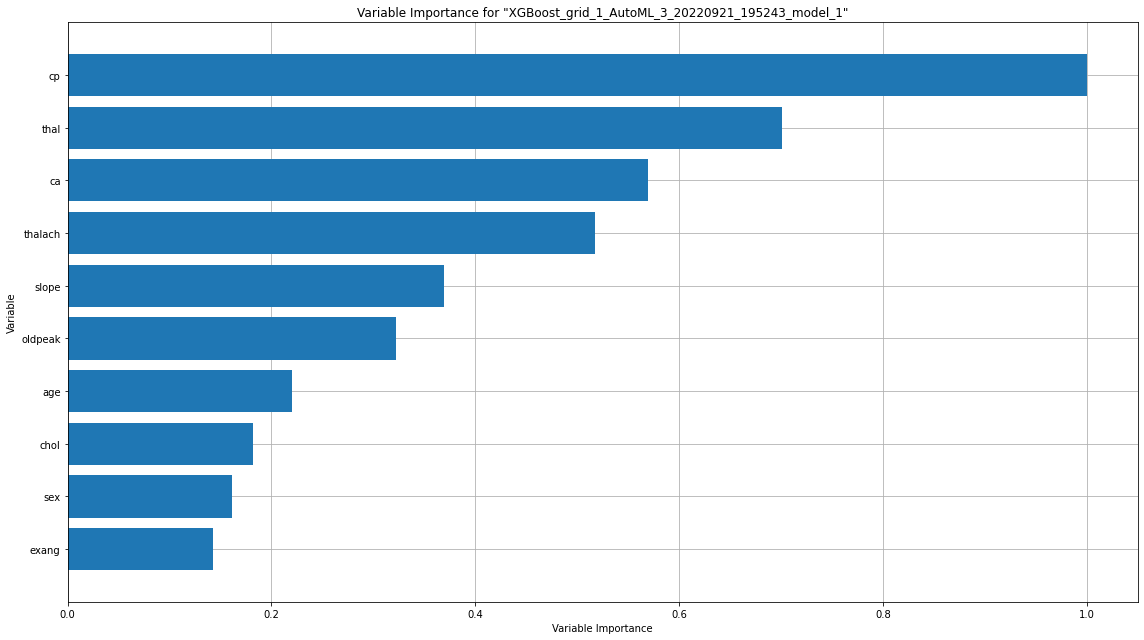

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

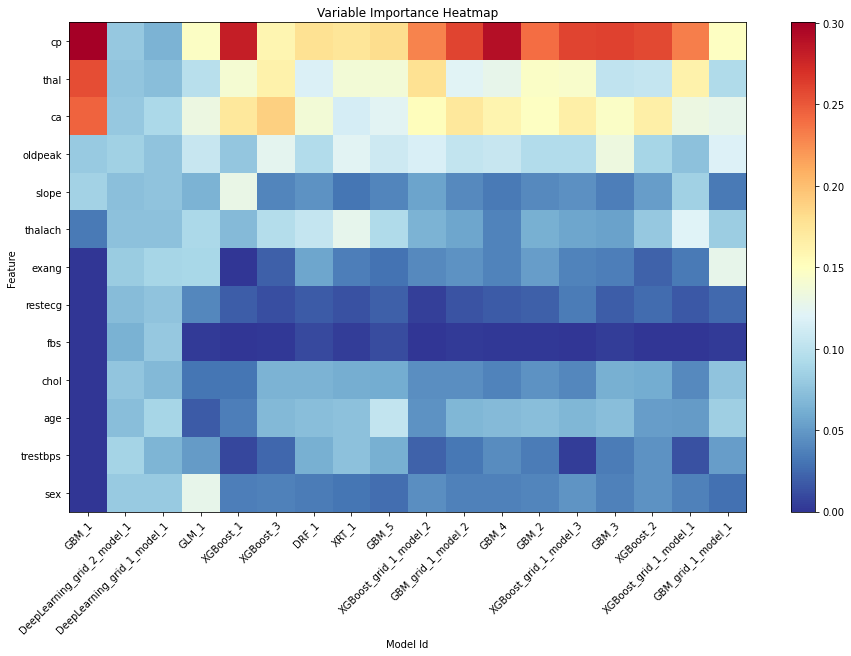

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

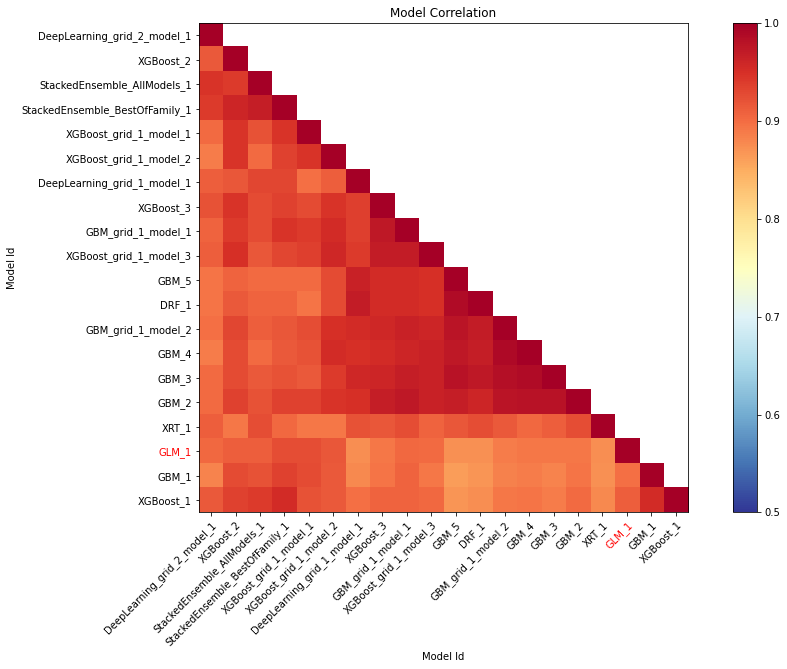

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

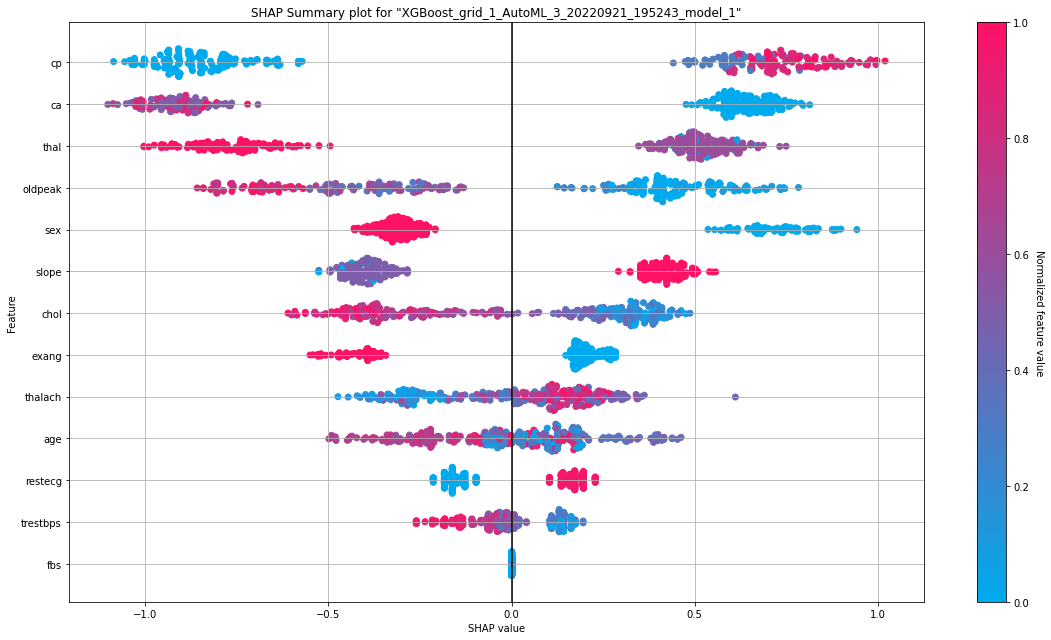

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

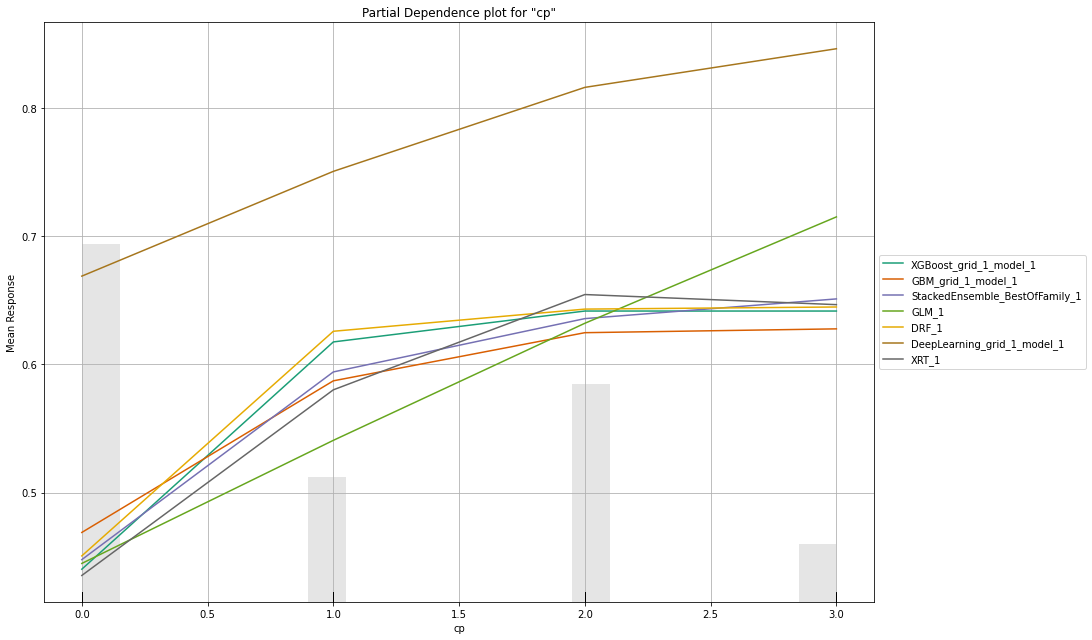

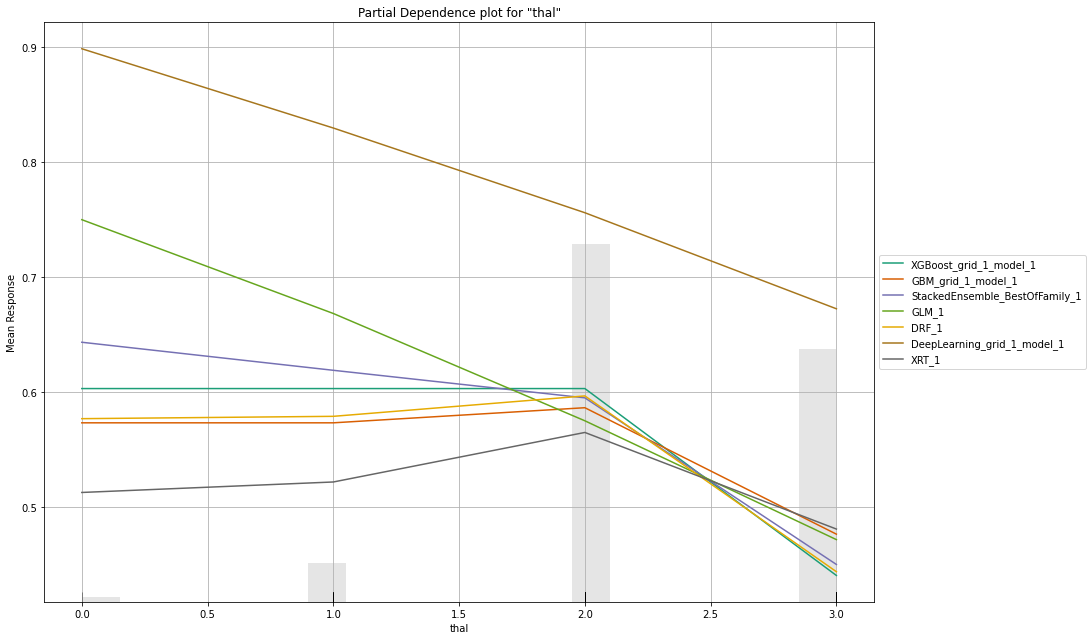

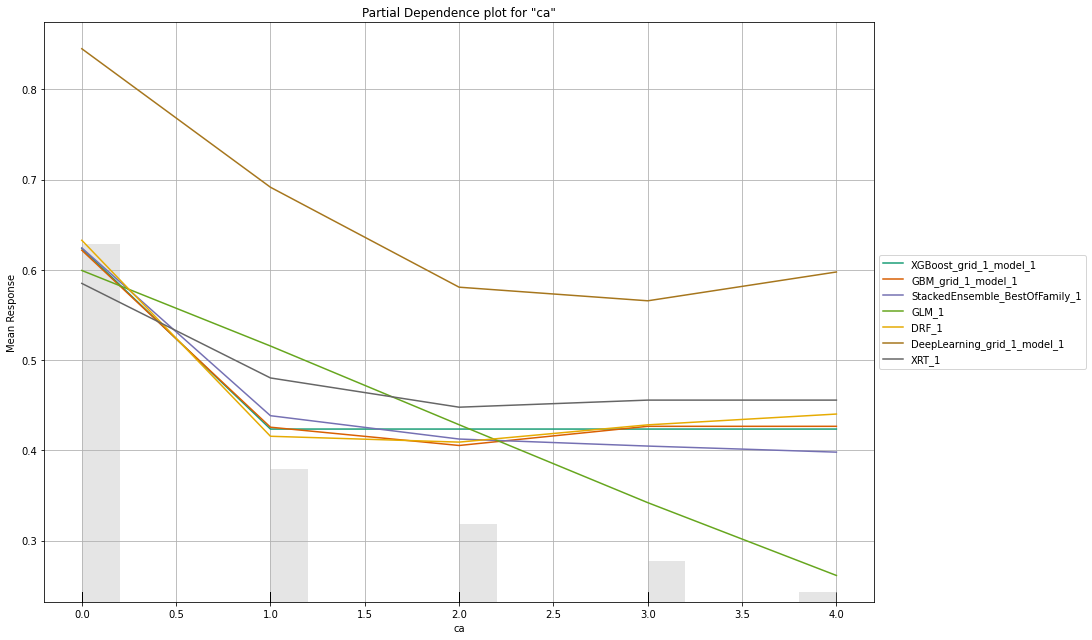

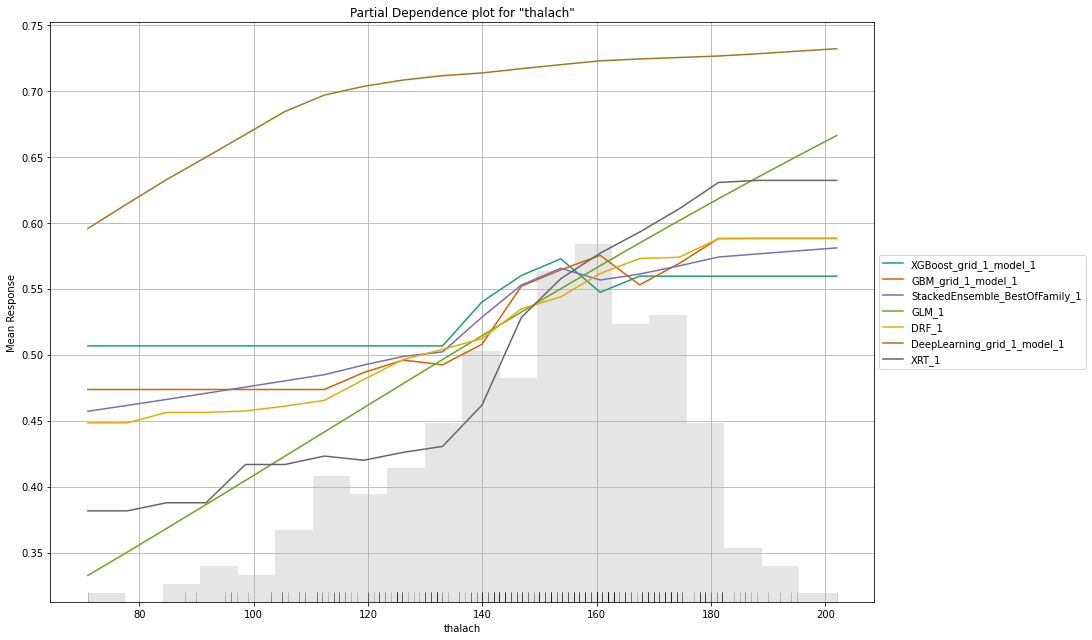

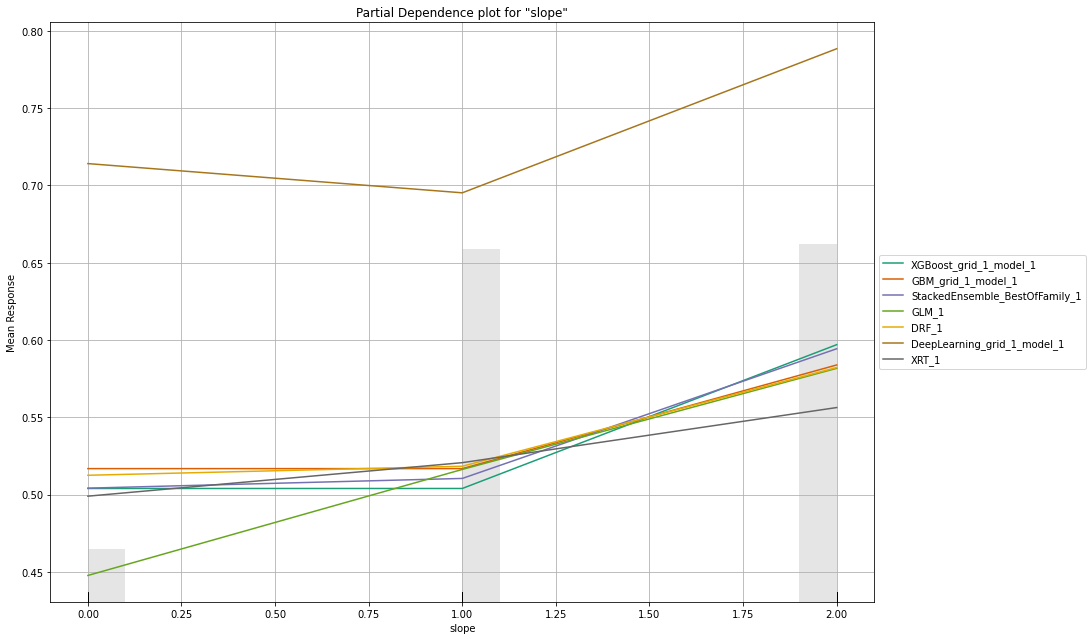

In [28]:
exm = aml.explain(hf)